#Описание проекта 

 На наш анализ имеются данные магазина компьютерных игр «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Описание данных:

- Name — название игры
- Platform — платформа
- Year\_of\_Release — год выпуска
- Genre — жанр игры
- NA\_sales — продажи в Северной Америке (миллионы проданных копий)
- EU\_sales — продажи в Европе (миллионы проданных копий)
- JP\_sales — продажи в Японии (миллионы проданных копий)
- Other\_sales — продажи в других странах (миллионы проданных копий)
- Critic\_Score — оценка критиков (максимум 100)
- User\_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.\*

```
    Нам предстоит: 
    *   Выявить определяющие успешность игры закономерности.
    *   Сделать ставку на потенциально популярный продукт
    *   Спланировать рекламные кампании

    Условия данных: перед нами данные до 2016 года. Условимся, что сейчас 2016 год и необходимо спланировать кампанию на 2017-й.
    Нужно отработать принцип работы с данными.

    Разобъем работу на этапы:
    1.   Ознакомимся с файлом и определимся, какими методами мы можем воспользоваться заранее для обработки и анализа
    2.   Используем методы обработки для преобразования все недочётов в данных
    3.   Далее на основе нужных нам данных проведем исследования по разным категориям, а так же определимся с выборкой для проведения гипотиз 
    4.   Визуализируем все данные которые удалось найти на графиках
    5.   Узнаем поведения пользователей в каждом представленном регионе, а так же просчитаем их зависимости
    6.   Анализ гепотиз, вывдвинем предположения
    7.   Применем статистический анализ к сформированым гепотизам, проведем тесты
    8.   Сформируем вывод на основе полученых данных, дадим им характеристику, выявим наиболее полезные рекомендации и слабые места.

```

# Обзор и предобработка файла с данными

In [1]:
#@title Импорт необходимых библиотек и файла магазина игр
import pandas as pd
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Импортируем наш дата фрейм магазина игр
df = pd.read_csv("/datasets/games.csv") 
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
# Приводим столбцы к нижнему регистру 
#df.columns = map(str.lower, df.columns) 
df.columns = df.columns.str.lower() 

In [4]:
#Выводим информацию о файле
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Проверяем стоблцы датафрейма на наличие пропусков 
df.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
# Проверяем датафлейм на дубликаты
df.duplicated().sum() 

0

In [7]:
# Проверяем на неявные дубликаты 
df[df.name.str.lower().duplicated()].sort_values(by='name', ascending=True).head(30) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
2243,007: The World is not Enough,PS,2000.0,Action,0.51,0.35,0.00,0.06,61.0,6.7,T
15656,11eyes: CrossOver,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10076,18 Wheeler: American Pro Trucker,GC,2002.0,Racing,0.09,0.02,0.00,0.00,52.0,6.8,E
12283,187: Ride or Die,XB,2005.0,Racing,0.05,0.01,0.00,0.00,51.0,6.9,M


In [8]:
# Найденая аномалия - непопознанная строки без указания названия игры (их можно удалить)
df.dropna(subset=['name'], inplace=True) 

In [9]:
# заполняем пропуски в оценках критиков, т.к. можно сделать вывод что по умолчанию у фильма нет оценки
df['critic_score'] = df.critic_score.fillna(0) 

In [10]:
# Так же поступаем с оценкой пользвателей
df['user_score'] = df.user_score.fillna(0) 

In [11]:
# Переведем в целочисленный вид 
df['year_of_release'] = df['year_of_release'].astype('Int64') 

In [12]:
#Округялем оценки критиков до целых 
df['critic_score'] = df.critic_score.astype('Int64') 

In [13]:
#Заменяем значения tbd на значения nan
df.loc[df['user_score']=="tbd", 'user_score']=np.nan 

In [14]:
# Заполняем пропуски в оценках пользователей
df['user_score'] = df.user_score.fillna(0.0)   

In [15]:
#Так же округляем оценки пользователей
df['user_score'] = df.user_score.astype('float') 

In [16]:
# Заполним значения пропусков на empty для понимания и различия в данных в дальнейшем (заменять\генерировать не стоит)
df['rating'] = df.rating.fillna('empty') 

In [17]:
#Переводим значения показателей продаж в разряд миллионов
na_sales_mil_copy = round(df.na_sales.sum() / 1000, 1)
eu_sales_mil_copy = round(df.eu_sales.sum() / 1000, 1)
jp_sales_mil_copy = round(df.jp_sales.sum() / 1000, 1)
other_sales_mil_copy = round(df.other_sales.sum() / 1000, 1)
print('Количество проданных копий Северной Америке :', na_sales_mil_copy, 'млн.')
print('Количество проданных копий Европе :', eu_sales_mil_copy, 'млн.')
print('Количество проданных копий Японии :', jp_sales_mil_copy, 'млн.')
print('Количество проданных копий Других странах :', other_sales_mil_copy, 'млн.')

Количество проданных копий Северной Америке : 4.4 млн.
Количество проданных копий Европе : 2.4 млн.
Количество проданных копий Японии : 1.3 млн.
Количество проданных копий Других странах : 0.8 млн.


#### Вывод:
##### По итогу обзора файла мы выявли участки данных где имеются отсутсвующие значения, дубликаты, аномалии и не корректные форматы данных. После обработки мы убрали аномалии, разобрались с пропущенными значениями убрав их из датафрейма, а так же поставили заглушку в рейтинге для корректной и полной работы с данными.

# Исследовательский анализ данных

### Узнаем сколько игр выпускалось в разные годы. Оценем важность данных за все периоды.

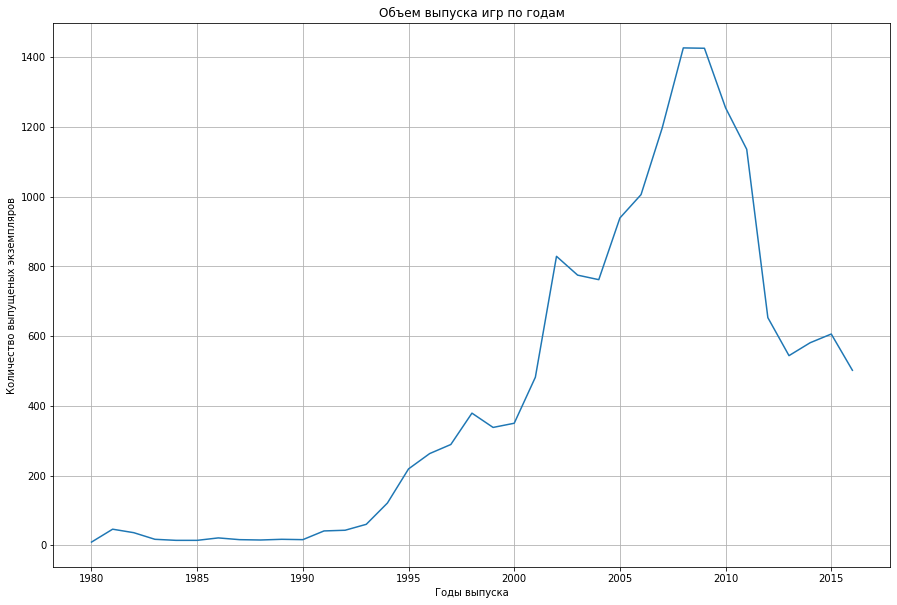

In [18]:
df.groupby('year_of_release')['name'].count().plot(x='year_of_release',
                                                   y=['name'],
                                                   linestyle='-',
                                                   grid=True,
                                                   figsize=(15,10),
                                                   xlabel='Годы выпуска',
                                                   ylabel='Количество выпущеных экземпляров',
                                                   title='Объем выпуска игр по годам')
plt.show();

<b>Вывод: На графике видно большой скачек продаж количества игр с 1995 года по 2010, а затем было падение продаж за последующие годы

Проверим изменение по платформам

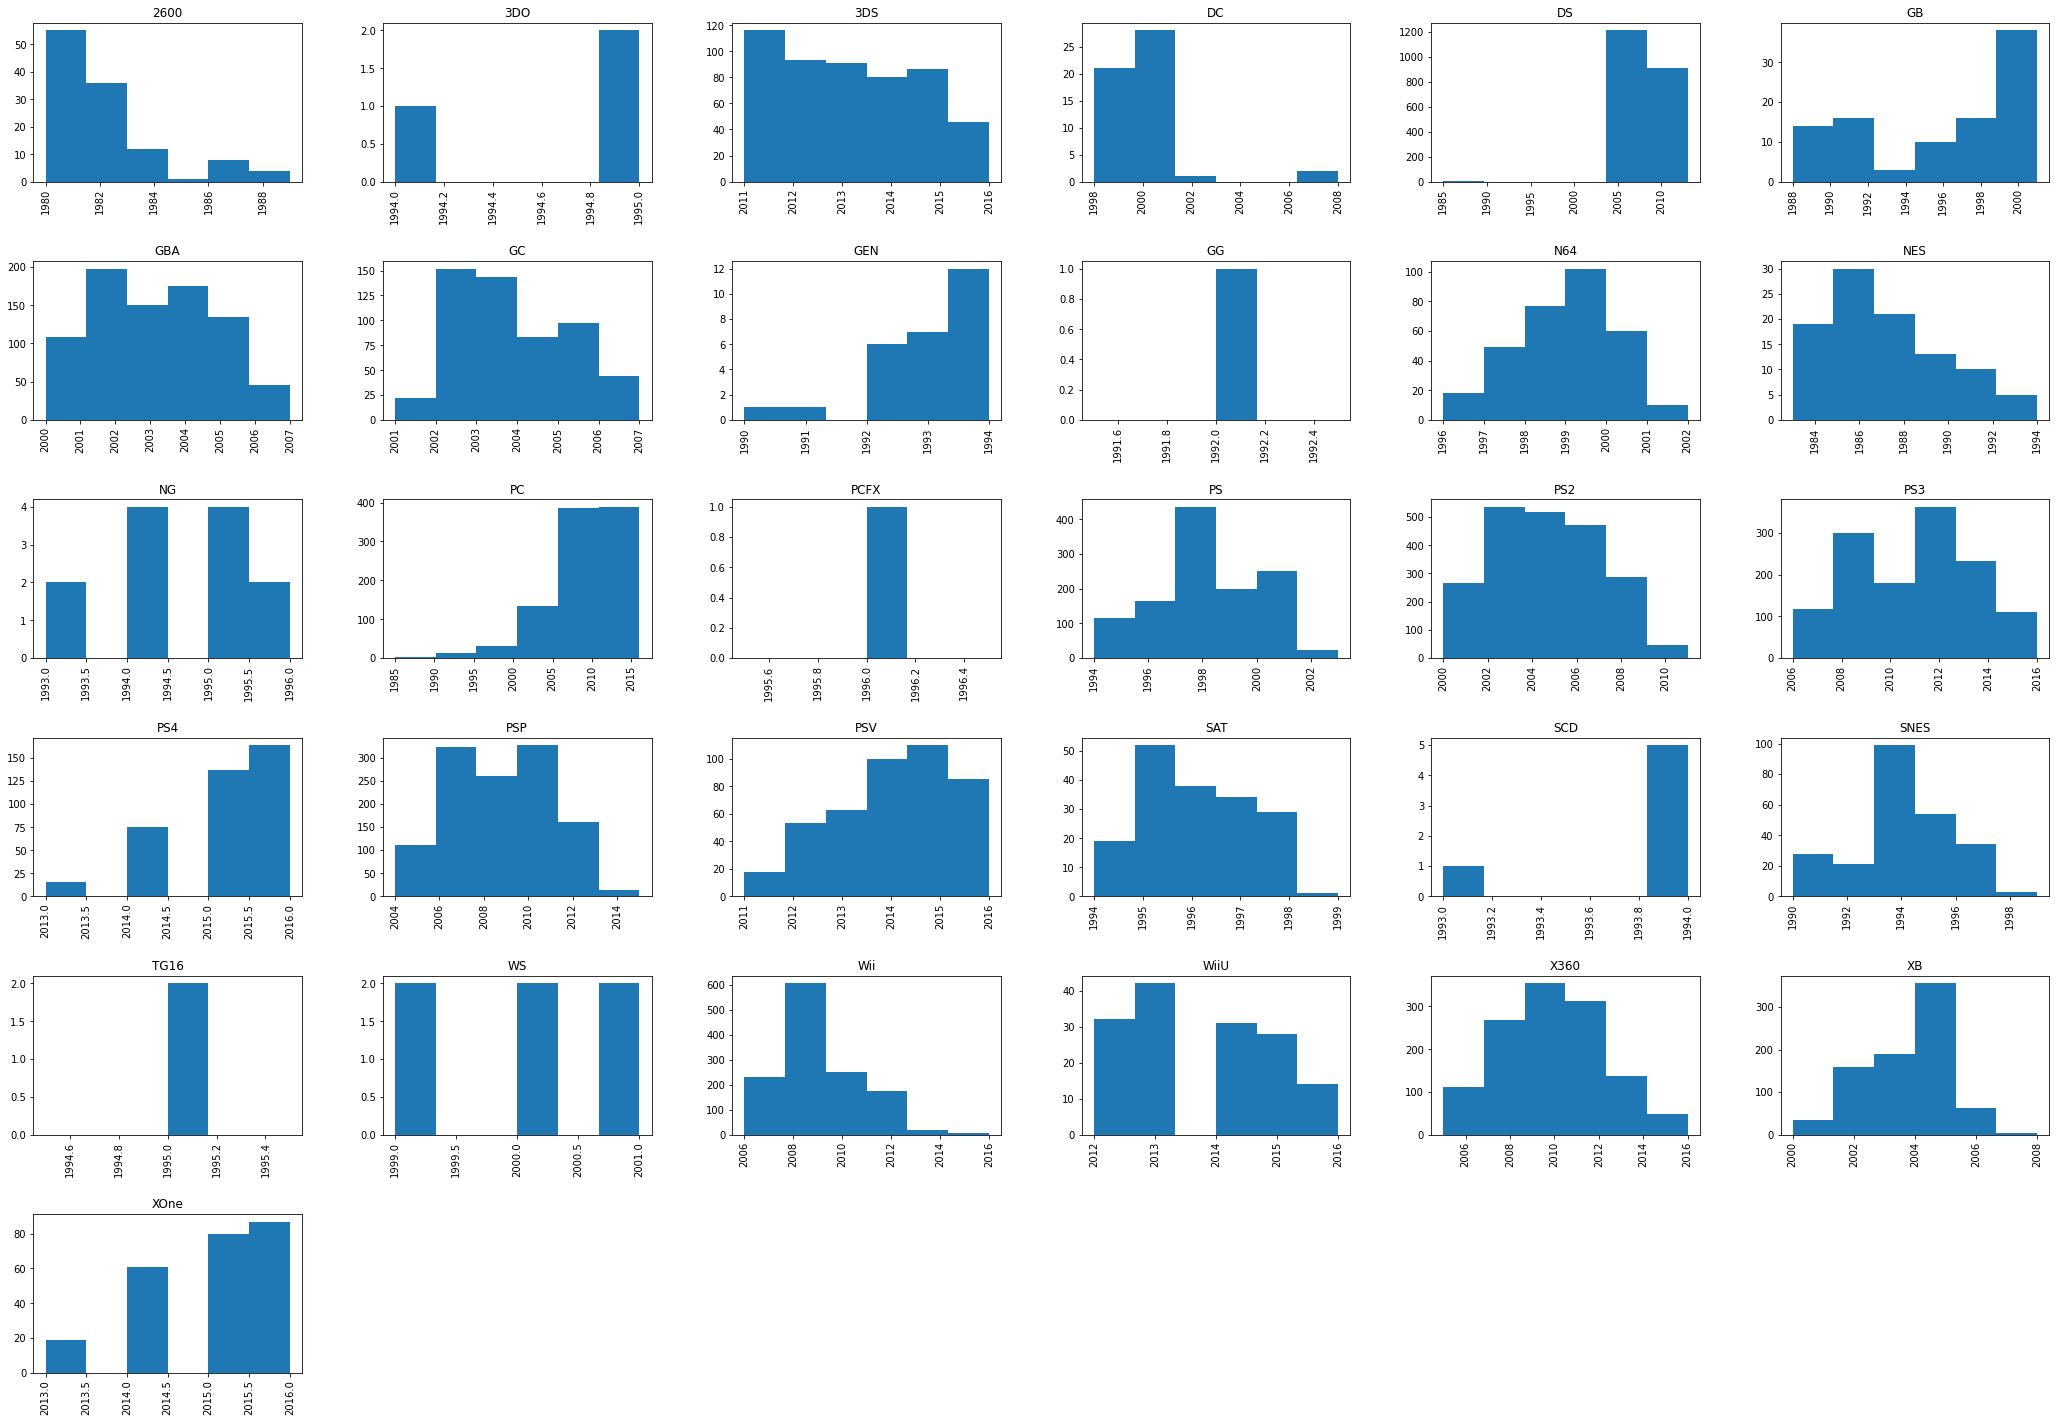

In [19]:
# Посмотрим на общее распределение выпуска игр по каждой платформе
df[['platform','year_of_release']].hist(by='platform', 
                                        figsize=(35,25), 
                                        grid=True, 
                                        bins=6)
plt.show();

In [20]:
# Найдем топ 30 платформ по объему суммарных продаж за все время
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df_plot = df.pivot_table(index=['platform','year_of_release'], 
                         values='total_sales', 
                         aggfunc='sum').sort_values(by='total_sales', 
                                                    ascending=False).head(30)
df_plot

total_sales
platform year_of_release             
PS2      2004                  211.81
Wii      2009                  206.97
PS2      2002                  205.38
         2003                  184.31
Wii      2008                  171.32
X360     2010                  170.03
PS       1998                  169.49
PS2      2001                  166.43
         2005                  160.66
PS3      2011                  156.78
Wii      2007                  152.77
DS       2007                  146.94
         2008                  145.31
PS       1999                  144.53
X360     2011                  143.84
PS3      2010                  142.17
Wii      2006                  137.15
PS       1997                  136.17
X360     2008                  135.26
PS3      2009                  130.93
DS       2005                  130.14
Wii      2010                  127.95
X360     2009                  120.29
DS       2006                  119.81
         2009                  119.54
PS4      2015                  118.90
PS3      2008                  118.52
         2013                  113.25
         2012                  107.36
PS2      2006                  103.42

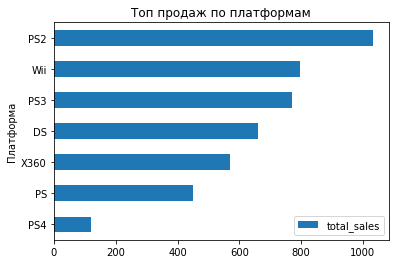

          total_sales
platform             
PS2           1032.01
Wii            796.16
PS3            769.01
DS             661.74
X360           569.42
PS             450.19
PS4            118.90


In [21]:
# топ продаж платформ по объему суммарных продаж за все время
df_plot.pivot_table(index=['platform'], 
                         values='total_sales', 
                         aggfunc='sum').sort_values(by='total_sales', 
                                                    ascending=True).plot(kind='barh',
                                                                         xlabel='Платформа',
                                                                        title='Топ продаж по платформам')
plt.show();
print(df_plot.pivot_table(index=['platform'], 
                         values='total_sales', 
                         aggfunc='sum').sort_values(by='total_sales', 
                                                    ascending=False))


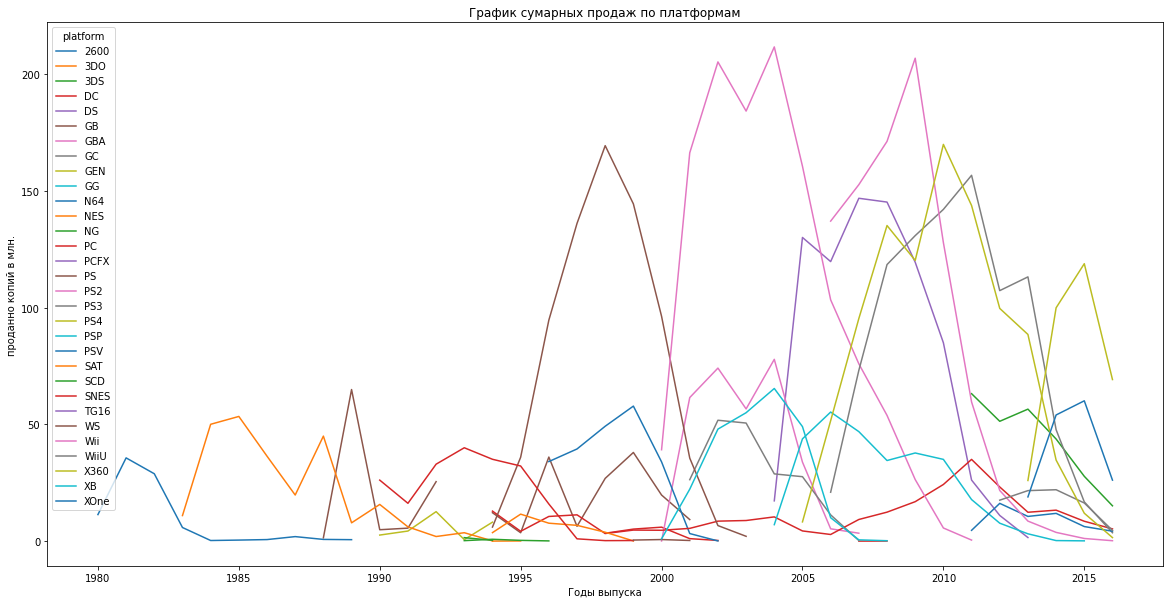

In [91]:
# Отобразим наш Топ 30 на графике 
df_plot.pivot_table(index='year_of_release',
                    columns='platform',
                    values='total_sales',
                    aggfunc='sum').plot(figsize=(20,10),
                                        title='График сумарных продаж по платформам', 
                                        xlabel='Годы выпуска', 
                                        ylabel='проданно копий в млн.')
plt.show();

In [39]:
# Среднее время прадаж по платформам 
print('Средннее время продаж :', df_plot.groupby('platform').count().median())

Средннее время продаж : total_sales    5.0
dtype: float64


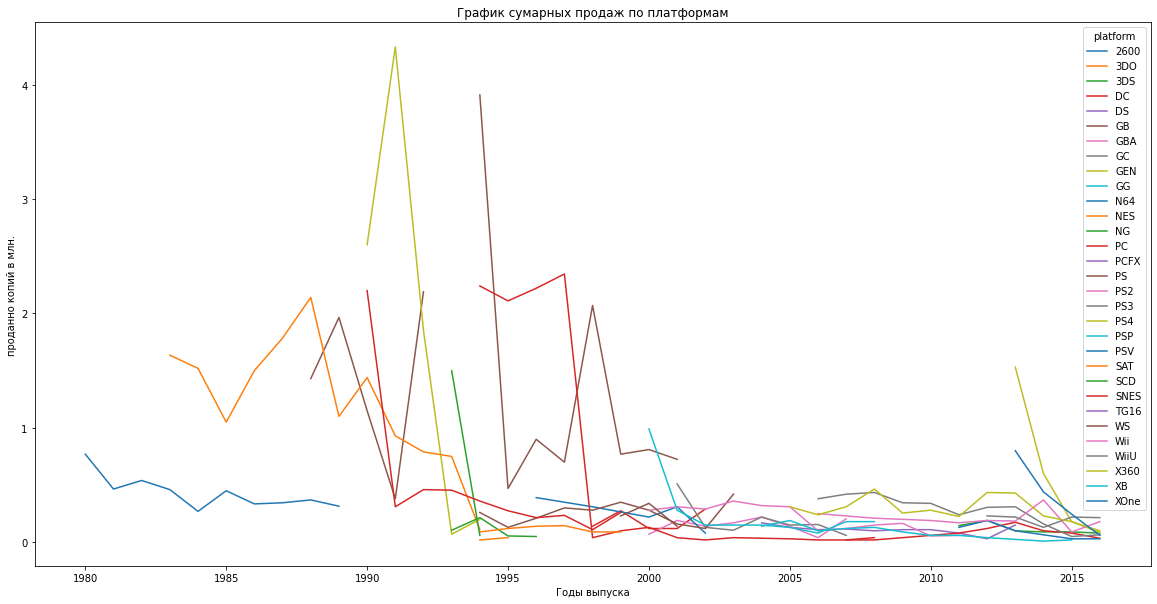

,platform,max,min
0,2600,1989,1980
1,3DO,1995,1994
2,3DS,2016,2011
3,DC,2008,1998
4,DS,2013,1985
5,GB,2001,1988
6,GBA,2007,2000
7,GC,2007,2001
8,GEN,1994,1990
9,GG,1992,1992


In [183]:
# Отобразим жизнь платформ на графике 
df.pivot_table(index='year_of_release',
                    columns='platform',
                    values='total_sales',
                    aggfunc='median').head(50).plot(figsize=(20,10),
                                        title='График сумарных продаж по платформам', 
                                        xlabel='Годы выпуска', 
                                        ylabel='проданно копий в млн.')
plt.show();
df_life_plat = df.pivot_table(index='platform',
                    values='year_of_release',
                    aggfunc=['max','min'])
df_life_plat.columns = [['max','min']]
df_life_plat = df_life_plat.reset_index()
df_life_plat['max'] = df_life_plat['max'].astype('int64')
df_life_plat['min'] = df_life_plat['min'].astype('int64')
df_life_plat

Средний срок жизни платформ в целом 7-10 лет , пик актуальности приходится на 4-5 лет

In [24]:
# Берем выборку из последних 3 лет (округляем математически до целого)
df_act = df.loc[(df['year_of_release'] > 2013)].sort_values(by='total_sales', ascending=False).reset_index(drop=True)
df_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,empty,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,empty,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,empty,7.98


In [25]:
# Рейтинг самых окупаемых актуальных платформ
df_act_top_plat = df_act.pivot_table(index=['platform','year_of_release'], values=['total_sales'], aggfunc = 'sum').sort_values(by='total_sales', ascending=False).head(10).reset_index(drop=False)
df_act_top_plat

,platform,year_of_release,total_sales
0,PS4,2015,118.90
1,PS4,2014,100.00
2,PS4,2016,69.25
3,XOne,2015,60.14
4,XOne,2014,54.07
5,PS3,2014,47.76
6,3DS,2014,43.76
7,X360,2014,34.74
8,3DS,2015,27.78
9,XOne,2016,26.15


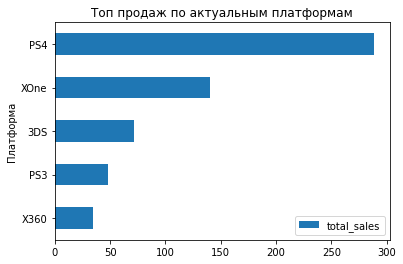

          total_sales
platform             
PS4            288.15
XOne           140.36
3DS             71.54
PS3             47.76
X360            34.74


In [26]:
df_act_top_plat.pivot_table(index=['platform'], 
                         values='total_sales', 
                         aggfunc='sum').sort_values(by='total_sales', 
                                                    ascending=True).plot(kind='barh',
                                                                         xlabel='Платформа',
                                                                        title='Топ продаж по актуальным платформам')
plt.show();
print(df_act_top_plat.pivot_table(index=['platform'], 
                         values='total_sales', 
                         aggfunc='sum').sort_values(by='total_sales', 
                                                    ascending=False))

Самые перспективные платформы исходя из наших графиков это PS4 и XBOX ONE 

Платформа  PS4
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score       1.00000       0.90367
critic_score     0.90367       1.00000


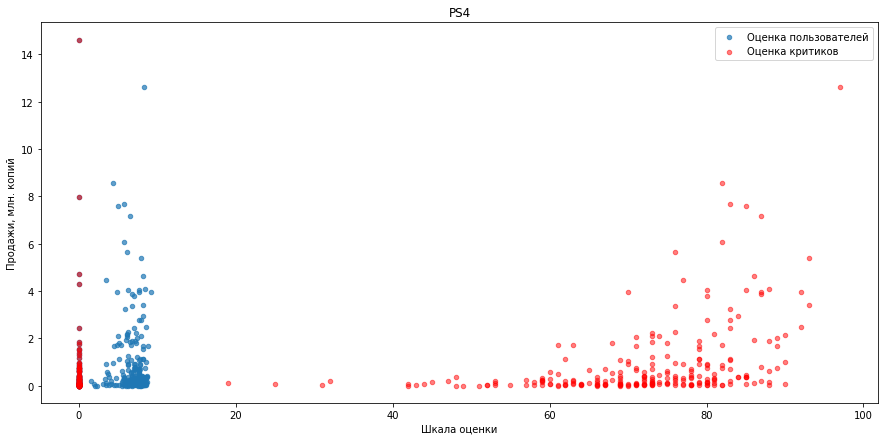

Платформа  3DS
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score      1.000000      0.887491
critic_score    0.887491      1.000000


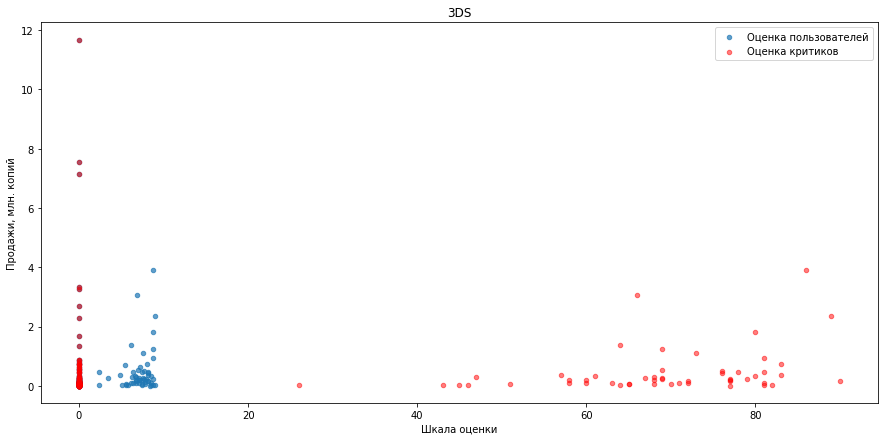

Платформа  XOne
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score      1.000000      0.793371
critic_score    0.793371      1.000000


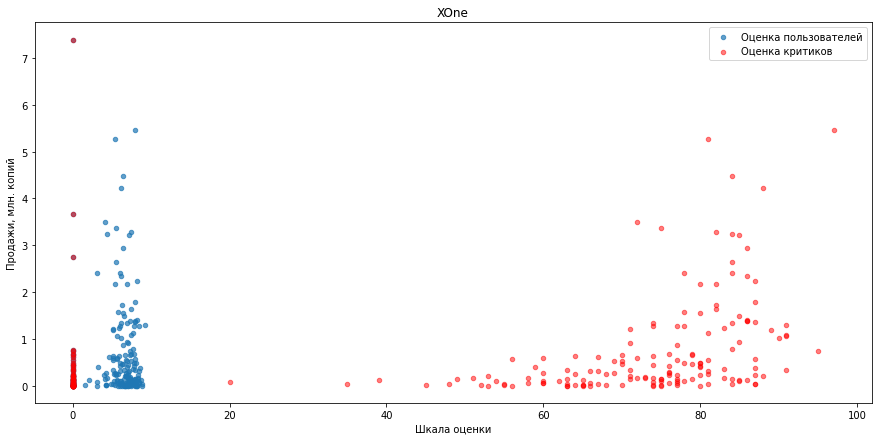

Платформа  WiiU
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score      1.000000      0.831632
critic_score    0.831632      1.000000


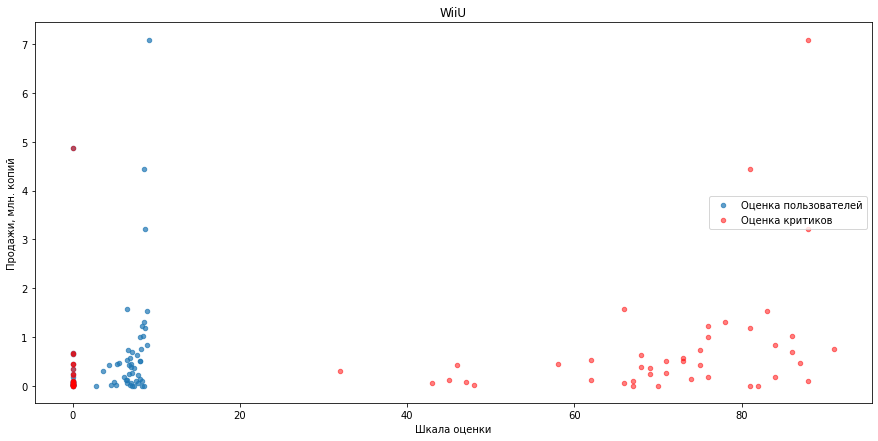

Платформа  PS3
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score      1.000000      0.517978
critic_score    0.517978      1.000000


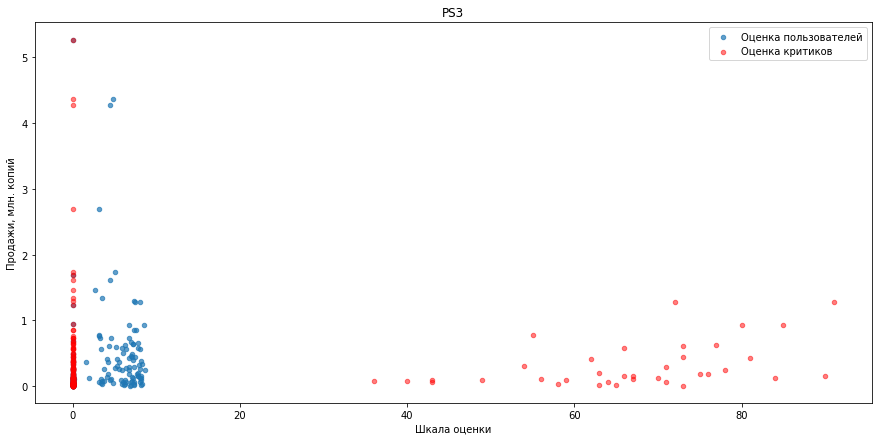

Платформа  X360
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score      1.000000      0.375578
critic_score    0.375578      1.000000


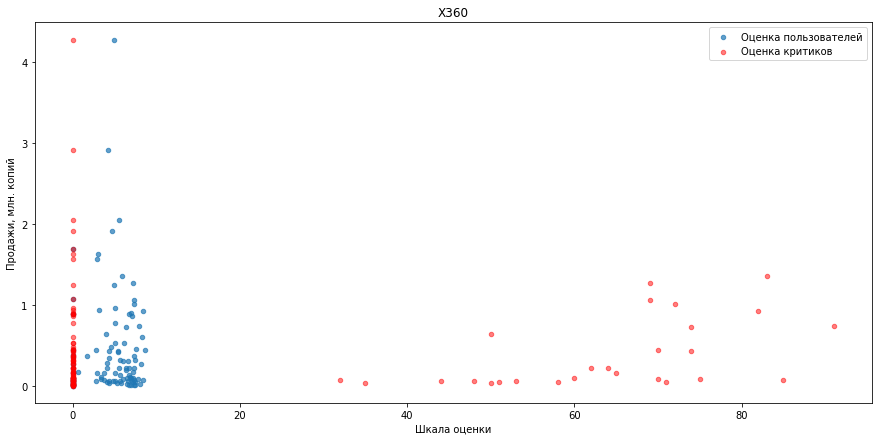

Платформа  PC
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score      1.000000      0.786678
critic_score    0.786678      1.000000


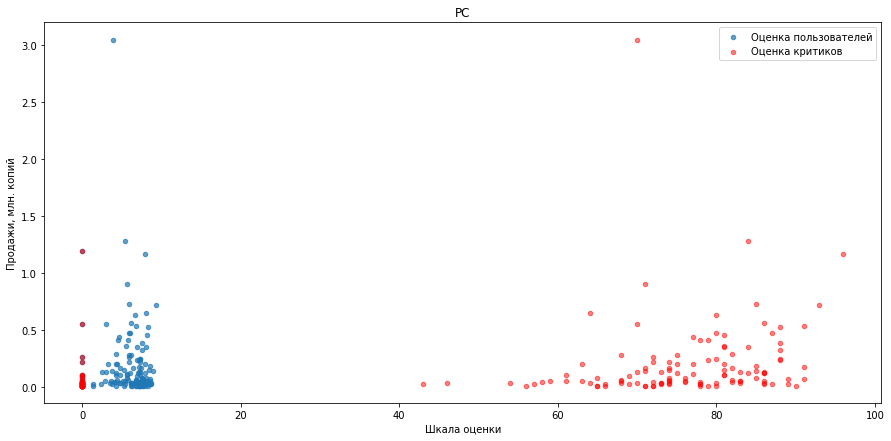

Платформа  Wii
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score           1.0           NaN
critic_score         NaN           NaN


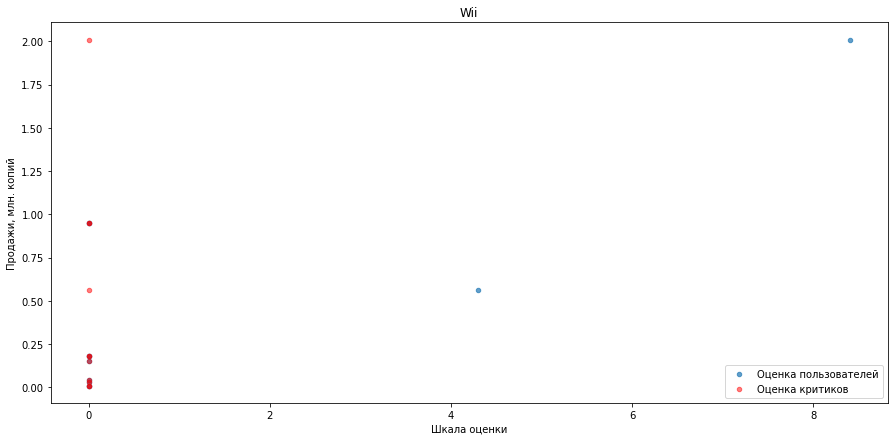

Платформа  PSV
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score      1.000000      0.823909
critic_score    0.823909      1.000000


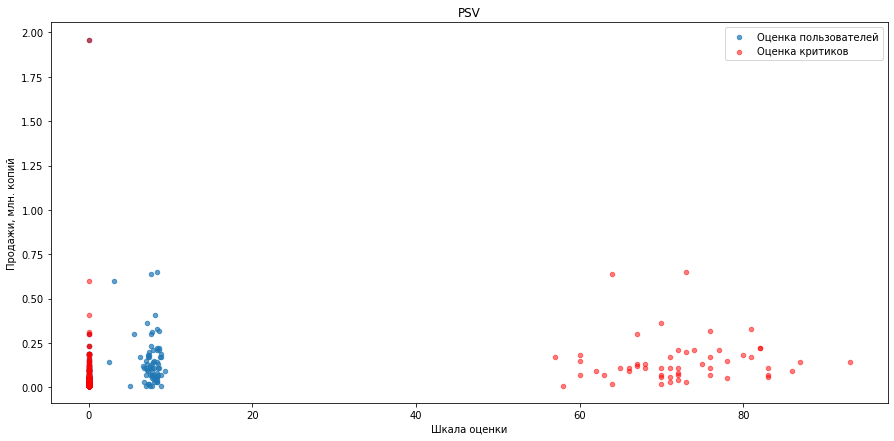

Платформа  PSP
Коэффициент корреляции Пирсона
              user_score  critic_score
user_score           NaN           NaN
critic_score         NaN           NaN


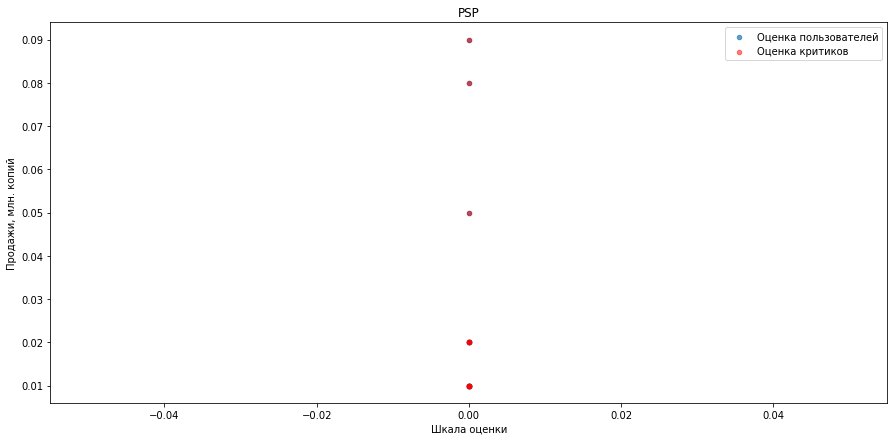

In [27]:
for platform in df_act['platform'].unique():
    ax1 = df_act[df_act['platform'] == platform].plot(kind='scatter', 
                                            x ='user_score', 
                                            y='total_sales',
                                            alpha=0.7,
                                            label='Оценка пользователей', figsize=(15,7))
    ax2 = df_act[df_act['platform'] == platform].plot(kind='scatter', 
                                            x ='critic_score', 
                                            y='total_sales', 
                                            ax=ax1, 
                                            color='red', 
                                            alpha=0.5,
                                            label='Оценка критиков', figsize=(15,7))
    plt.title(platform)
    plt.xlabel('Шкала оценки')
    plt.ylabel('Продажи, млн. копий')
    print('Платформа ', platform)
    temp_df = df_act.query('platform == "' + platform + '"')
    print('Коэффициент корреляции Пирсона')
    print(temp_df[['user_score', 'critic_score']].corr())
    plt.show();

Результат исследования оценок показал что пользователи как правило ставят до 20-30 баллов на актуальные игры, видно неудовлетворение продуктом, критики распределили свое мнение более рассеяно и имеют  разные оценки во всех диапазонах, кроме платформ DS и PSP, возможно имется связь с отсутствием небходимости оценивать данные платформы, а так же нет популярных жанров, которые имеют больший охват аудитории.

Влияние на продажи оценки пользователей в целом имеют "отложенный харрактер" и не сильно влияют на продажи в периоды выхода игр, а оценки критиков имеют скорее оперативную оценку, скорее всего для рекламного характера продукта что оказывает влияние на продажи. 

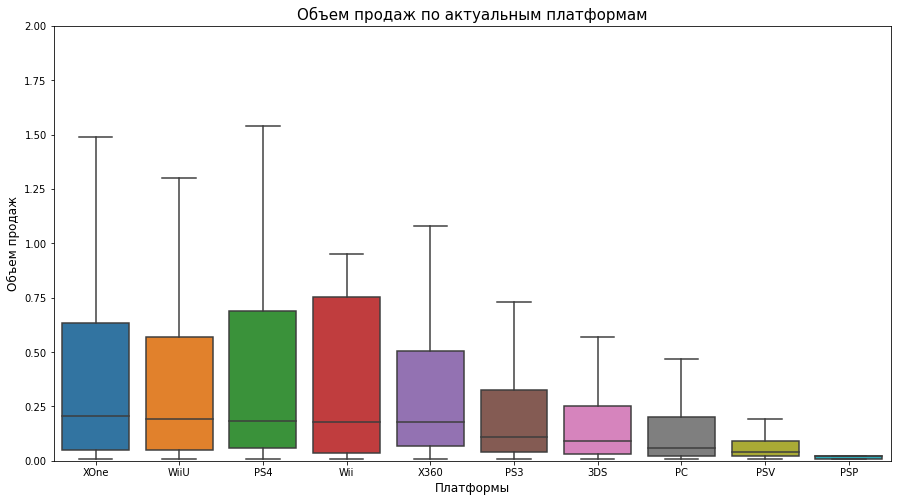

In [28]:
# Создаем сортировку по медиане для платформ
median_order = (df_act.groupby('platform')['total_sales'].median().sort_values(ascending=False))
# Смотрим на распределение всех продаж по платформам 
plt.figure(figsize=(15,8))
plt.ylim(0, 2)
sns.boxplot(data=df_act, x='platform', y='total_sales', order=median_order.index, showfliers=False);
plt.title('Объем продаж по актуальным платформам', fontsize=15)
plt.xlabel('Платформы', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show();

По объему продаж занимает платформы: XBOX ONE, PS4, WiiU , Wii, имея схожую средний объем, но имея различные максимумы

In [29]:
# Рейтинг самых окупаемых актуальных платформ
df_act_top_genre = df_act.pivot_table(index=['genre','year_of_release'], values=['na_sales','eu_sales','jp_sales','total_sales'], aggfunc = 'sum').sort_values(by='total_sales', ascending=False).reset_index(drop=False)
df_act_top_genre_only = df_act.pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales','total_sales'], aggfunc = 'sum').sort_values(by='total_sales', ascending=False).reset_index(drop=False).head()


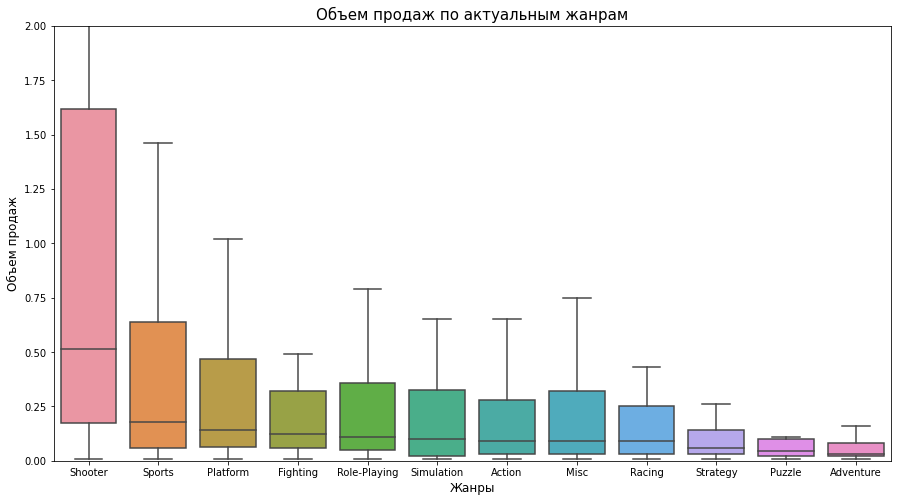

In [30]:
# Создаем сортировку по медиане для жанров
median_order = (df_act.groupby('genre')['total_sales'].median().sort_values(ascending=False))
# Смотрим на распределение всех продаж по жанрам 
plt.figure(figsize=(15,8))
plt.ylim(0, 2)
sns.boxplot(data=df_act, x='genre', y='total_sales', order=median_order.index, showfliers=False);
plt.title('Объем продаж по актуальным жанрам', fontsize=15)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show();

По показателям на графике можно заключить что наибольшую долю продаж занимает жанр "Shooter" 

### Вывод: 
#### Из нашего иследования мы можем понять что есть определенные жанры и платформы которые имеют наибольший интерес среди "геймеров", например платформы PS, XBOX, PC. Так же видим зависимость что критики оценивают так же наиболее популярные игры с наибольшим охватом, а среди малоизвестных мнений критиков нет.

# Портрет пользователя каждого региона

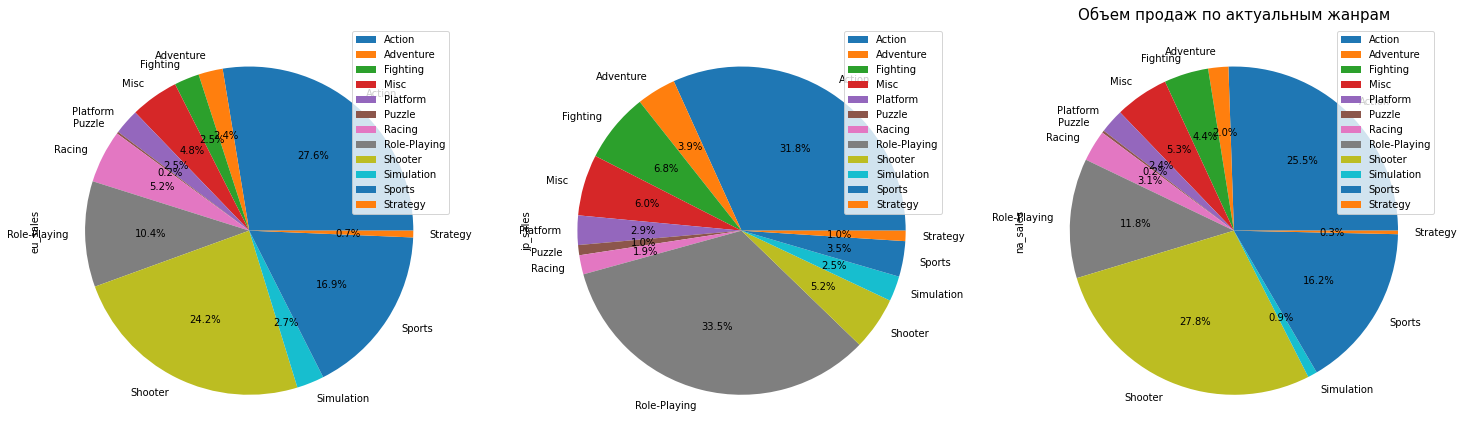

In [31]:
# Сделаем разбивку по каждому жанру из нашего актуального набора, разбив по столбцам продаж регионов
df_act.pivot_table(index='genre', 
                   values=['na_sales', 'eu_sales','jp_sales'], 
                   aggfunc='sum').plot(kind='pie', 
                                       subplots=True, 
                                       figsize=(25, 25),
                                       autopct = '%1.1f%%')
plt.title('Объем продаж по актуальным жанрам', fontsize=15, loc='center')
plt.show();

По оценке продаж в регионах можно пронаблюдать схожие предпочтения жанров в на рынках Америки и Европы, и различный от них рынок Японской игровой индустрии.

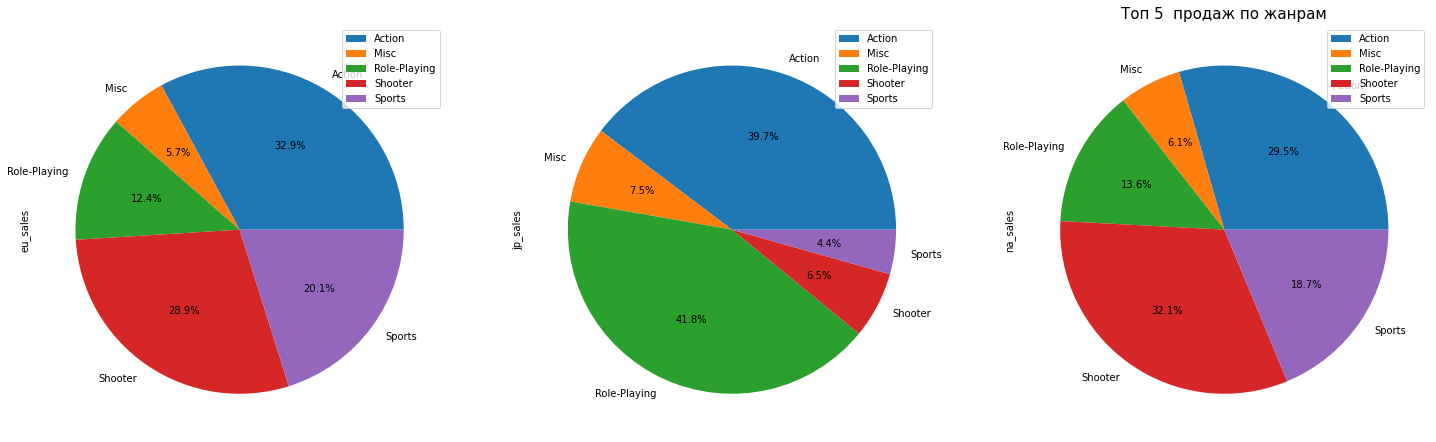

In [32]:
# Повторим разбивку, но для топ 5 продаж в жанрах
df_act_top_genre_only.pivot_table(index='genre', 
                   values=['na_sales', 'eu_sales','jp_sales'], 
                   aggfunc='sum').plot(kind='pie', 
                                       subplots=True, 
                                       figsize=(25, 25),
                                       autopct = '%1.1f%%')
plt.title('Топ 5  продаж по жанрам', fontsize=15, loc='center')
plt.show();

Диаграммы долей жанров в регионах Северной Америки и Европы прктически схожи между собой Shooter,Action и Sports, в отличии от предпочтений жанров Японского рынка, там привалируют Role-Playing и Action

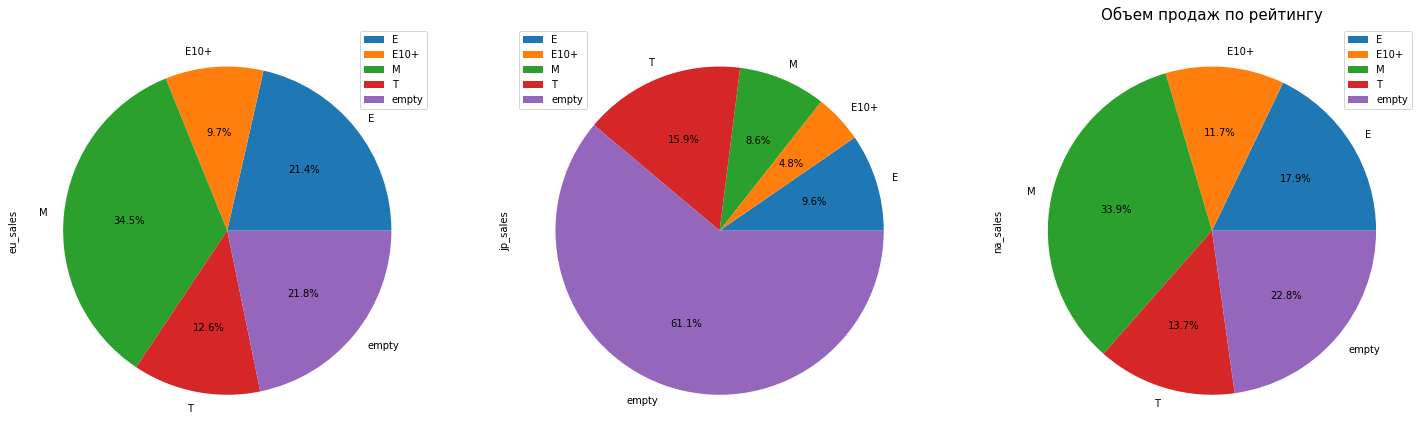

In [33]:
# Выявляем влияние продаж в странах по их рейтингу 
df_act.pivot_table(index='rating', 
                   values=['na_sales', 'eu_sales','jp_sales'], 
                   aggfunc='sum').plot(kind='pie', 
                                       subplots=True, 
                                       figsize=(25, 25),
                                       autopct = '%1.1f%%')
plt.title('Объем продаж по рейтингу', fontsize=15, loc='center')
plt.show();

Диаграммы долей рейтинга в регионах Северной Америки и Европы прктически схожи между собой , в отличии от предпочтений рейтингов Японского рынка

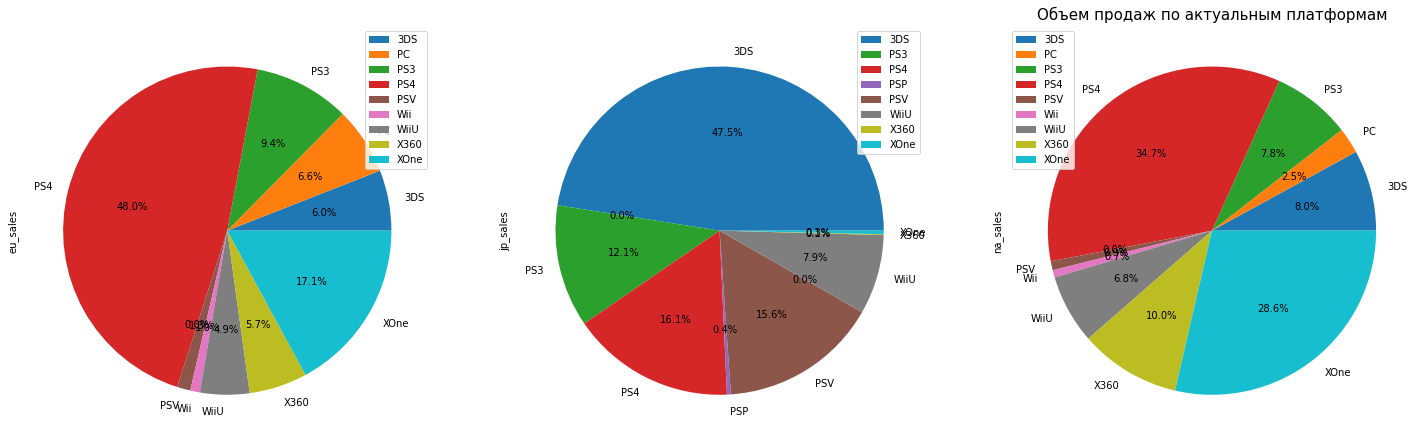

In [34]:
# Сделаем разбивку по каждому жанру из нашего актуального набора, разбив по столбцам продаж регионов
df_act.pivot_table(index='platform', 
                   values=['na_sales', 'eu_sales','jp_sales'], 
                   aggfunc='sum').plot(kind='pie', 
                                       subplots=True, 
                                       figsize=(25, 25),
                                       autopct = '%1.1f%%')
plt.title('Объем продаж по актуальным платформам', fontsize=15, loc='center')
plt.show();

Среди платформ в странах Северной америки и Европы предпочитают: PS4 и Xbox One. В у японской аудитории доминирует 3DS Занимая почти 48% от всего объема продаж

# Проверка гипотез

## Гипотеза №1 : "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Данная гипотеза о равенстве рейтингов платформ

## Гипотеза №2: "Средние пользовательские рейтинги жанров Action и Sports разные". Данная гипотеза о не равенстве рейтингов у жанров.


In [35]:
# Проверка гипотезы №1 
Xbox_One = (df_act[(df_act['platform']=='XOne')]['user_score'])
PC = (df_act[(df_act['platform']=='PC')]['user_score'])

alpha = .05 
results = st.ttest_ind(Xbox_One, PC, equal_var=False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
   print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.31981092459797966
Не получилось отвергнуть нулевую гипотезу


### Пояснение: Для проверки гипотизы №1 нам нужно выбрать метод статистического анализа для формирования верного решения и вывода на основе полученых результатов
#### Выбор гепотиз: За основу Н0 гепотизы мы взяли минимальное отклонение и как альтернативу Н1 гипотезу показывающее большие отклонения от поставленой задачи.
#### Использовали метод t-test ind (Уэлча) - т.к. проверку гипотезы проводили выборках с неизвестным отклонением 

In [36]:
# Проверка гипотезы 
Xbox_One = (df_act[(df_act['genre']=='Action')]['user_score'])
PC = (df_act[(df_act['genre']=='Sports')]['user_score'])

alpha = .05 
results = st.ttest_ind(Xbox_One, PC, equal_var=False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
   print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0006646333120910831
Отвергаем нулевую гипотезу


Нулевая гипотеза — принимаемое по умолчанию предположение о том, что не существует связи между двумя наблюдаемыми событиями, феноменами. 

# Общий вывод: 

####                                                Резюмируя пройденный анализ
 - В ходе нашего анализа, на осонове предоставленных нам данных от магазина "Стримчик" мы обработали множество данных и определились с направление нашего будующего исследования. 
 - Выявили определяющие успешность игры закономерности. Поняли какие платформы самые прибыльные в мире и собрали их топ. 
 - Обозначили среднее время жизни каждой платформы, что пригодилось нам для формирования понимания и выборки данных. 
 - Сформировали таблицу с актуальными платформами за последние 5 лет с которой в дальнейшем и продолжим работать. Из  нашего нового датафрейма вывели информацию в графиках по каждой платформе и жанру в целом, для определения текущих мировых продуктовых трендов в сфере компьютерных игр. 
 - Узнали пользовательские оценки, а так же оценки критиков на игры, увидив некоторую закономерность в распределении оценок. 
 - Углубились в "портрет пользователя" для рассмотрения предпочтений по жанрам в разных регионах мира, отобразив информацию в виде круговых диаграмм с длями в процентном соотношении. 
 - Так же рассмотрели влияние рейтинга самой игры в каждом регионе на долю продаж. Определили лидеров рейтига игр в Северной Америке и Европе это - М(~ 39%) и Е (~20%); в Японии оказались популярны игры без официального рейтинга выданного ESRB (вероятно нишевые разработчики публикующиеся неофициально, либо имеющие ограничения). 
    

            
 - #### Сформировали две гипотезы:
1.    Первая о схожести оценок пользователей Xbox One и PC допустив за нулевую гепотезу то что оценки одинаковые. Проведя тестирование мы не смогли отвергнуть нулевую гепотезу и допускаем что в среднем оценки все же схожи.
2.   Вторая гипотеза была на сверку оценок пользователей в жанрах игры Action и Sports, а за нулевую гипотезу мы примем их различие. В данном тесте мы отвергли нулевую гипотезу и пологаем что оценки в этих жанрах не сильно различиаются.


---
    
####                                            Какие прогнозы и рекомендации можно дать
 - - Обратить внимание на поведение пользователей и их предпочтения
 - - Актуализировать продажи на актуальных платформах. На данный момент большую долю продаж имеют XBOX ONE И PS4
 - - Преобретать самые ходовые жанры такие как: Shooters, Action, Sports и Role-Playing. Они принесут максимальную прибыль
 - - В отдельных регонах сделать акценты на рейтин возростной аудитории и делать закупки в правельных пропорциях
 - - Следить за выходом новинок в лидирующих Платфомах и Жанрах, делать анонсы поступления и промо и рекламные акции для клиентов. В свою очередь это хорошо отразится на продажах и на росте потенциальных покупателей данного магазина.